**Import** **Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Load dataset**

In [3]:
dataset = pd.read_csv('/content/movieReviews.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    165 non-null    object
 1   Type    165 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [5]:
dataset

,text,Type
0,I remember the first time I saw this Pixar mov...,neutral
1,This is an alright animated film by Disney for...,neutral
2,I don't hate this movie but it's not as perfec...,neutral
3,Even as a kid sitting in the theater seeing th...,neutral
4,"It has a good story.Rather than that,it's not ...",neutral
...,...,...
160,"""Bee Movie"" is a witty animated film that expl...",neutral
161,If you start looking at it on a critical level...,neutral
162,Barry B. Benson (Jerry Seinfeld) is a bee who ...,neutral
163,I distinctly remember my negative reaction to ...,neutral


# **Visualize distribution**

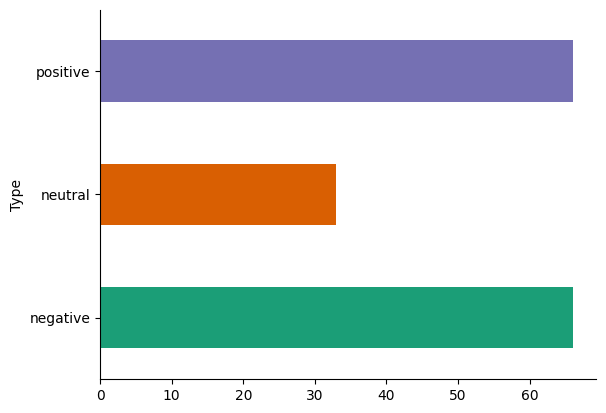

In [6]:
# @title Type

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

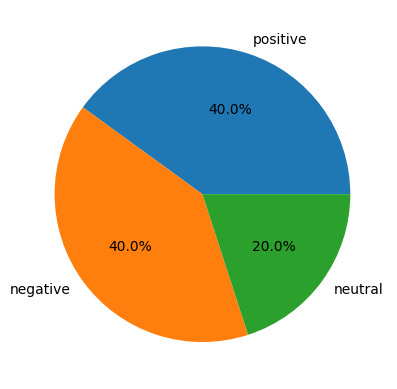

In [7]:
x = dataset['Type'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

# **Install Backtranslation Libraries**

In [8]:
!pip install transformers
!pip install sentencepiece
from transformers import MarianMTModel, MarianTokenizer

Select the minority class for augmentation

In [9]:
neutral = dataset[dataset['Type'] == 'neutral']
print(len(neutral))
print(neutral)

33
                                                  text     Type
0    I remember the first time I saw this Pixar mov...  neutral
1    This is an alright animated film by Disney for...  neutral
2    I don't hate this movie but it's not as perfec...  neutral
3    Even as a kid sitting in the theater seeing th...  neutral
4    It has a good story.Rather than that,it's not ...  neutral
5    Many of the earliest screen savers were of fis...  neutral
6    Finding Nemo was clever, cute, well written an...  neutral
7    Its basically the fish version of the Wizard o...  neutral
8    Being a film that titillated female viewers, c...  neutral
9    Finding Nemo: 6/10: As a kid's movie Finding N...  neutral
10   This is great entertainment, don't get me wron...  neutral
11   The line between fantasy and reality is becomi...  neutral
12   Don't get me wrong I enjoyed the movie. But I ...  neutral
13   Finding Nemo is an okay movie. The idea is goo...  neutral
14   I am in my mid-thirties and have

# **Model Configuration**

In [10]:
# Get the name of the first model
first_model_name = 'Helsinki-NLP/opus-mt-en-fr'

# Get the tokenizer
first_model_tkn = MarianTokenizer.from_pretrained(first_model_name)

# Load the pretrained model based on the name
first_model = MarianMTModel.from_pretrained(first_model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [11]:
# Get the name of the second model
second_model_name = 'Helsinki-NLP/opus-mt-fr-en'

# Get the tokenizer
second_model_tkn = MarianTokenizer.from_pretrained(second_model_name)

# Load the pretrained model based on the name
second_model = MarianMTModel.from_pretrained(second_model_name)

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [12]:
original_texts = []
for rows in neutral.itertuples():
    # Create list for the current row
    my_list =rows.text

    # append the list to the final list
    original_texts.append(my_list)
print(original_texts)

['I remember the first time I saw this Pixar movie when it first came out when I was in elementary school. I thought it was alright back then but nothing special. And didn\'t have the impact on me during my childhood like the movie "Lion King" or the first "Toy Story" did. Didn\'t think it was a bad film back then but wasn\'t enthusiastic about it to the point I wanted to see it a second time. Now seeing it again as an adult in 3D my opinions about this movie is still about the same but I appreciate it a bit more. So the story is about a Clown fish that loses his only son and he goes across the ocean with a friend fish named Dory played by Ellen DeGeneres. Who did a amazing job with her role, in fact her character stood out the most in the whole movie. And through the journey it shows what Nemo is going through after being captured by the humans but mostly shows Nemo\'s dad\'s journey with clever fish scenarios thrown in different areas. And the clever scenarios mixed in with different

In [13]:
def format_batch_texts(language_code, batch_texts):

  formated_bach = [">>{}<< {}".format(language_code, text) for text in batch_texts]

  return formated_bach

In [14]:
# Test of the function
format_batch_texts("fr", original_texts)

['>>fr<< I remember the first time I saw this Pixar movie when it first came out when I was in elementary school. I thought it was alright back then but nothing special. And didn\'t have the impact on me during my childhood like the movie "Lion King" or the first "Toy Story" did. Didn\'t think it was a bad film back then but wasn\'t enthusiastic about it to the point I wanted to see it a second time. Now seeing it again as an adult in 3D my opinions about this movie is still about the same but I appreciate it a bit more. So the story is about a Clown fish that loses his only son and he goes across the ocean with a friend fish named Dory played by Ellen DeGeneres. Who did a amazing job with her role, in fact her character stood out the most in the whole movie. And through the journey it shows what Nemo is going through after being captured by the humans but mostly shows Nemo\'s dad\'s journey with clever fish scenarios thrown in different areas. And the clever scenarios mixed in with di

In [15]:
def perform_translation(batch_texts, model, tokenizer, language="fr"):
    # Prepare the text data into appropriate format for the model
    formated_batch_texts = format_batch_texts(language, batch_texts)

    # Generate translation using model
    translated = model.generate(**tokenizer(formated_batch_texts, return_tensors="pt", padding=True))

    # Convert the generated tokens indices back into text
    translated_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

    return translated_texts

In [16]:
max_length = first_model.config.max_length
original_texts = [text[:700] for text in original_texts]

In [17]:
translated_texts = perform_translation(original_texts, first_model, first_model_tkn)

In [18]:
translated_texts

['Je me souviens de la première fois que j\'ai vu ce film Pixar quand il est sorti quand j\'étais à l\'école primaire. Je pensais que c\'était bien à l\'époque, mais rien de spécial. Et n\'a pas eu l\'impact sur moi pendant mon enfance comme le film "Lion King" ou le premier "Toy Story" l\'a fait. Je ne pensais pas que c\'était un mauvais film à l\'époque mais n\'était pas enthousiaste à ce sujet au point que je voulais le voir une deuxième fois. Maintenant, le revoir en tant qu\'adulte en 3D mes opinions sur ce film est encore à peu près le même mais je l\'apprécie un peu plus. Donc l\'histoire est sur un poisson Clown qui perd son seul fils et il va à travers l\'océan avec un poisson ami nommé Dory joué par Ellen DeGeneres.',
 "J'ai trouvé l'histoire un peu simple mais bon à regarder. Je n'ai pas pleinement apprécié ce film d'animation de Disney. La sélection de castes était géniale. Ils étaient vraiment connectés à leurs personnages respectifs.Ce film d'animation Disney révèle aux t

In [19]:
back_translated_texts = perform_translation(translated_texts, second_model, second_model_tkn)

In [20]:
back_translated_texts

['I remember the first time I saw this movie Pixar when it came out when I was in primary school. I thought it was good at the time, but nothing special. And didn\'t have the impact on me during my childhood like the movie "Lion King" or the first "Toy Story" did. I didn\'t think it was a bad film at the time but wasn\'t enthusiastic about it to the point that I wanted to see it a second time. Now, seeing it as an adult in 3D my opinions about this film is still pretty much the same but I like it a little more. So the story is on a Clown fish that loses its only son and it goes through the ocean with a friendly fish named Dory played by Ellen DeGeneres.',
 "I found the story a little simple but good to watch. I didn't fully enjoy this Disney animated film. The caste selection was great. They were really connected to their respective characters.This Disney animated film reveals to viewers the importance of the places. It's really important to live everything the world has to offer in li

In [21]:
def perform_back_translation(batch_texts, original_language="en", temporary_language="fr"):

  # Translate from Original to Temporary Language
  tmp_translated_batch = perform_translation(batch_texts, first_model, first_model_tkn, temporary_language)

  # Translate Back to English
  back_translated_batch = perform_translation(tmp_translated_batch, second_model, second_model_tkn, original_language)

  # Return The Final Result
  return back_translated_batch

In [22]:
def combine_texts(original_texts, back_translated_batch):

  return set(original_texts + back_translated_batch)

In [23]:
back_translated_batch = perform_back_translation(original_texts)
back_translated_batch

['I remember the first time I saw this movie Pixar when it came out when I was in primary school. I thought it was good at the time, but nothing special. And didn\'t have the impact on me during my childhood like the movie "Lion King" or the first "Toy Story" did. I didn\'t think it was a bad film at the time but wasn\'t enthusiastic about it to the point that I wanted to see it a second time. Now, seeing it as an adult in 3D my opinions about this film is still pretty much the same but I like it a little more. So the story is on a Clown fish that loses its only son and it goes through the ocean with a friendly fish named Dory played by Ellen DeGeneres.',
 "I found the story a little simple but good to watch. I didn't fully enjoy this Disney animated film. The caste selection was great. They were really connected to their respective characters.This Disney animated film reveals to viewers the importance of the places. It's really important to live everything the world has to offer in li

# **Combine original and augmented data**

In [24]:
def perform_back_translation_with_augmentation(batch_texts, original_language="en", temporary_language="fr"):

  # Translate from Original to Temporary Language
  tmp_translated_batch = perform_translation(batch_texts, first_model, first_model_tkn, temporary_language)

  # Translate Back to English
  back_translated_batch = perform_translation(tmp_translated_batch, second_model, second_model_tkn, original_language)

  # Return The Final Result
  return combine_texts(original_texts, back_translated_batch)

In [25]:
final_augmented = perform_back_translation_with_augmentation(original_texts)
final_augmented

{'"Antz" and "A Bug\'s Life" were both about individuality, then "Bee Movie" comes along to add to that same narrative. I\'m just waiting for the termites and wasps to come out with their movie about breaking away from the hive/colony.In "Bee Movie" Barry (Jerry Seinfeld) doesn\'t want to do the job he\'s been assigned to do. What\'s more, he is repulsed by the idea that humans collect all the sweet honey bees make. Barry wants to do his own thing and he wants all bees of the world to be free to not have to make honey. To achieve that Barry takes the honey manufacturing companies to court.The biggest difference between this insect movie and the two aforementioned is that these insects are even more',
 '"Antz" and "A Bug\'s Life" were both about individuality, then "Bee Movie" is added to this same story. I\'m just waiting for the termites and wasps to go out with their movie on the breakup of the hive/colonie. In "Bee Movie" Barry (Jerry Seinfeld) doesn\'t want to do the work assigned 

# **Define complete Dataset**

In [26]:
list(final_augmented)

["My expectations weren't very high for Bee Movie, but it somehow fulfilled what little hope I had that the star power would come through. Unlike Sharktale, where an equally admirable couple of talents combined voice-work (Scorsese and De Niro), Jerry Seinfeld, who co-wrote and co-produced the picture as well, has the right kind of attitude to change up the typical animated movie while not ever reinventing it. It's a tricky enterprise to recommend, because for kids it might have some wit to it that they might not really get, despite the color palette being almost as fresh as Pixar's Cars, and for adults there isn't the plethora of instantly quotable lines and unforgettable innuendo and eccentr",
 "With such great actors in the cast, you might have thought Bee Movie would be so much different from other animation movies. Instead, the same old story - a single bee from the beechive has the revelation of their well planed but still boring life, so it tries to have a different one. It goes

In [27]:
augmented_neutral = []
for rows in final_augmented:
    # Create list for the current row
    my_list = [rows, "neutral"]

    # append the list to the final list
    augmented_neutral.append(my_list)
print(augmented_neutral)

[["My expectations weren't very high for Bee Movie, but it somehow fulfilled what little hope I had that the star power would come through. Unlike Sharktale, where an equally admirable couple of talents combined voice-work (Scorsese and De Niro), Jerry Seinfeld, who co-wrote and co-produced the picture as well, has the right kind of attitude to change up the typical animated movie while not ever reinventing it. It's a tricky enterprise to recommend, because for kids it might have some wit to it that they might not really get, despite the color palette being almost as fresh as Pixar's Cars, and for adults there isn't the plethora of instantly quotable lines and unforgettable innuendo and eccentr", 'neutral'], ["With such great actors in the cast, you might have thought Bee Movie would be so much different from other animation movies. Instead, the same old story - a single bee from the beechive has the revelation of their well planed but still boring life, so it tries to have a different

In [28]:
dropped_neutral = dataset.drop(dataset[dataset['Type'] == 'neutral'].index)

In [29]:
dropped_neutral.head()

,text,Type
15,"Marlin, a nervous and neurotic clownfish is he...",positive
16,Yes you read that correctly.Finding Nemo had b...,positive
17,I didn't see this movie until it came out on D...,positive
18,Can Pixar and Disney miss with a film? Both To...,positive
19,"Never, and I mean, never, in my entire life, h...",positive


In [32]:
fullDataset = dropped_neutral.append(pd.DataFrame(augmented_neutral,
               columns=[ 'text', 'Type']),
               ignore_index = True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [33]:
fullDataset = pd.concat([dropped_neutral, pd.DataFrame(augmented_neutral,
               columns=[ 'text', 'Type'])],
               ignore_index = True)

In [34]:
fullDataset.value_counts("Type")

Type
negative    66
neutral     66
positive    66
Name: count, dtype: int64

In [35]:
fullDataset

,text,Type
0,"Marlin, a nervous and neurotic clownfish is he...",positive
1,Yes you read that correctly.Finding Nemo had b...,positive
2,I didn't see this movie until it came out on D...,positive
3,Can Pixar and Disney miss with a film? Both To...,positive
4,"Never, and I mean, never, in my entire life, h...",positive
...,...,...
193,"With such great actors in the casting, you mig...",neutral
194,"""Bee Movie"" is a witty animated film that expl...",neutral
195,"""Bee Movie"" is a spirited animated film that e...",neutral
196,"In 1998, we had two films involving the life o...",neutral


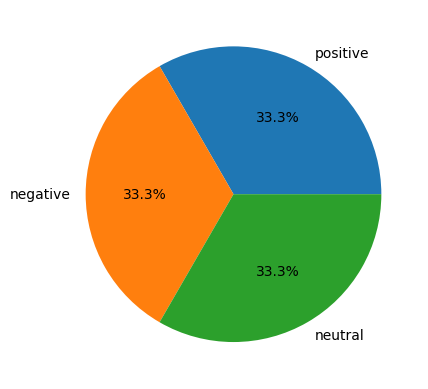

In [36]:
x = fullDataset['Type'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

In [37]:
MovieReviews_Augmented = fullDataset

In [38]:
MovieReviews_Augmented.to_csv('MovieReviews_Augmented.csv')